# Business Case

Multi-layer neural networks will be trained and evaluated based on data from Run or
Walk Reduced dataset.




# Attribute Information:
the dataset comprises the readings of motion sensors recorded while users executed
typical daily activities. The detailed format is described in the package. The attributes
correspond to raw sensor readings. There are a total of 11 attributes.
1. date
2. time
3. username
4. wrist
5. activity
6. acceleration_x
7. acceleration_y
8. acceleration_z
9. gyro_x
10. gyro_y
11. gyro_z

 There is an activity type represented by "activity" column which acts as label and reflects following activities:

"0": walking
"1": running
Apart of that, the dataset contains "wrist" column which represents the wrist where the device was placed to collect a sample on:

"0": left wrist
"1": right wrist
Additionally, the dataset contains "date", "time" and "username" columns which provide information about the exact date, time and user which collected these measurements.

# STEPS
1) Loading the file into the notebook
2) Merging the file to create a single file
3) Removing Info
4) Checking Describe
5) Creating variable that contain datatype (Int)
6) Creating variable that contain datatype (Object)
7) Checking unique value for int,object data
8) EDA (univariance and Bivarience)
9) Import sweetviz for analysing the Data
10) Finding null value
11) used labelencoder for Converting catergorical data to     numercial Data
12) Removing Boxplot for outliers
13) Feature Selection
14) Model Creation
15) Model Evaluation


In [1]:
# 'Numpy' is used for mathematical operations on large, multi-dimensional arrays and matrices
import numpy as np

# 'Pandas' is used for data manipulation and analysis
import pandas as pd

# 'Seaborn' is based on matplotlib; used for plotting statistical graphics
import seaborn as sns

# 'Matplotlib' is a data visualization library for 2D and 3D plots, built on numpy
import matplotlib.pyplot as plt
%matplotlib inline 
# suppress display of warnings
import warnings
warnings.filterwarnings('ignore')

In [3]:
data=pd.read_csv("walkrun.csv")

In [4]:
data

,date,time,username,wrist,activity,acceleration_x,acceleration_y,acceleration_z,gyro_x,gyro_y,gyro_z
0,2017-6-30,13:51:15:847724020,viktor,0,0,0.2650,-0.7814,-0.0076,-0.0590,0.0325,-2.9296
1,2017-6-30,13:51:16:246945023,viktor,0,0,0.6722,-1.1233,-0.2344,-0.1757,0.0208,0.1269
2,2017-6-30,13:51:16:446233987,viktor,0,0,0.4399,-1.4817,0.0722,-0.9105,0.1063,-2.4367
3,2017-6-30,13:51:16:646117985,viktor,0,0,0.3031,-0.8125,0.0888,0.1199,-0.4099,-2.9336
4,2017-6-30,13:51:16:846738994,viktor,0,0,0.4814,-0.9312,0.0359,0.0527,0.4379,2.4922
...,...,...,...,...,...,...,...,...,...,...,...
88583,2017-7-9,20:9:15:317911028,viktor,0,0,0.3084,-0.8376,-0.1327,0.4823,2.0124,0.6048
88584,2017-7-9,20:9:15:517889022,viktor,0,0,0.4977,-1.0027,-0.4397,0.1022,-1.2565,-0.0761
88585,2017-7-9,20:9:15:717828989,viktor,0,0,0.4587,-1.1780,-0.2827,-1.4500,-0.2792,-1.2616
88586,2017-7-9,20:9:15:917932987,viktor,0,0,0.2590,-0.8582,-0.0759,-1.5165,0.4560,-1.7755


## EDA

In [5]:
data.head()

,date,time,username,wrist,activity,acceleration_x,acceleration_y,acceleration_z,gyro_x,gyro_y,gyro_z
0,2017-6-30,13:51:15:847724020,viktor,0,0,0.2650,-0.7814,-0.0076,-0.0590,0.0325,-2.9296
1,2017-6-30,13:51:16:246945023,viktor,0,0,0.6722,-1.1233,-0.2344,-0.1757,0.0208,0.1269
2,2017-6-30,13:51:16:446233987,viktor,0,0,0.4399,-1.4817,0.0722,-0.9105,0.1063,-2.4367
3,2017-6-30,13:51:16:646117985,viktor,0,0,0.3031,-0.8125,0.0888,0.1199,-0.4099,-2.9336
4,2017-6-30,13:51:16:846738994,viktor,0,0,0.4814,-0.9312,0.0359,0.0527,0.4379,2.4922


## Summary Statistics 

In [6]:

data.describe()

,wrist,activity,acceleration_x,acceleration_y,acceleration_z,gyro_x,gyro_y,gyro_z
count,88588.000000,88588.000000,88588.000000,88588.000000,88588.000000,88588.000000,88588.000000,88588.000000
mean,0.522170,0.500801,-0.074811,-0.562585,-0.313956,0.004160,0.037203,0.022327
std,0.499511,0.500002,1.009299,0.658458,0.486815,1.253423,1.198725,1.914423
min,0.000000,0.000000,-5.350500,-3.299000,-3.753800,-4.430600,-7.464700,-9.480000
25%,0.000000,0.000000,-0.381800,-1.033500,-0.376000,-0.920700,-0.644825,-1.345125
50%,1.000000,1.000000,-0.059500,-0.759100,-0.221000,0.018700,0.039300,0.006900
75%,1.000000,1.000000,0.355500,-0.241775,-0.085900,0.888800,0.733700,1.398200
max,1.000000,1.000000,5.603300,2.668000,1.640300,4.874200,8.498000,11.266200


In [7]:
data.dtypes

date               object
time               object
username           object
wrist               int64
activity            int64
acceleration_x    float64
acceleration_y    float64
acceleration_z    float64
gyro_x            float64
gyro_y            float64
gyro_z            float64
dtype: object

In [8]:
data.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
wrist,88588.0,0.522170,0.499511,0.0000,0.000000,1.0000,1.000000,1.0000
activity,88588.0,0.500801,0.500002,0.0000,0.000000,1.0000,1.000000,1.0000
acceleration_x,88588.0,-0.074811,1.009299,-5.3505,-0.381800,-0.0595,0.355500,5.6033
acceleration_y,88588.0,-0.562585,0.658458,-3.2990,-1.033500,-0.7591,-0.241775,2.6680
acceleration_z,88588.0,-0.313956,0.486815,-3.7538,-0.376000,-0.2210,-0.085900,1.6403
gyro_x,88588.0,0.004160,1.253423,-4.4306,-0.920700,0.0187,0.888800,4.8742
gyro_y,88588.0,0.037203,1.198725,-7.4647,-0.644825,0.0393,0.733700,8.4980
gyro_z,88588.0,0.022327,1.914423,-9.4800,-1.345125,0.0069,1.398200,11.2662


## Checking Datatypes  

In [9]:
data.info ()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 88588 entries, 0 to 88587
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   date            88588 non-null  object 
 1   time            88588 non-null  object 
 2   username        88588 non-null  object 
 3   wrist           88588 non-null  int64  
 4   activity        88588 non-null  int64  
 5   acceleration_x  88588 non-null  float64
 6   acceleration_y  88588 non-null  float64
 7   acceleration_z  88588 non-null  float64
 8   gyro_x          88588 non-null  float64
 9   gyro_y          88588 non-null  float64
 10  gyro_z          88588 non-null  float64
dtypes: float64(6), int64(2), object(3)
memory usage: 7.4+ MB


In [10]:
# dimensions of data 

In [11]:
data.shape 


(88588, 11)

In [12]:
# checking missing values in data
data.isnull().sum()

date              0
time              0
username          0
wrist             0
activity          0
acceleration_x    0
acceleration_y    0
acceleration_z    0
gyro_x            0
gyro_y            0
gyro_z            0
dtype: int64

the above cell represent that No features have missing values.

## Checking for duplicates

In [13]:
data.duplicated().sum()

0

## Recheck the unique values 

In [14]:
for column in data.columns:
    if data[column].dtype == 'object':
        print(column.upper(),': ',data[column].nunique())
        print(data[column].value_counts().sort_values())
        print('\n')

DATE :  12
date
2017-7-4      3225
2017-7-7      3280
2017-7-2      3933
2017-6-30     3992
2017-7-1      4201
2017-7-10     4337
2017-7-11     6696
2017-7-9      7788
2017-7-15     7934
2017-7-6     11357
2017-7-17    11365
2017-7-16    20480
Name: count, dtype: int64


TIME :  88588
time
13:51:15:847724020    1
13:51:17:246767997    1
13:51:17:446569025    1
13:51:17:646152973    1
13:51:17:846502006    1
                     ..
20:9:12:517301976     1
20:9:12:317988991     1
20:9:12:117035984     1
20:9:14:917038023     1
20:9:16:117410004     1
Name: count, Length: 88588, dtype: int64


USERNAME :  1
username
viktor    88588
Name: count, dtype: int64




In [15]:
data.drop(['date','time','username'], axis = 1,inplace=True)

## Checking skewness of the dataset

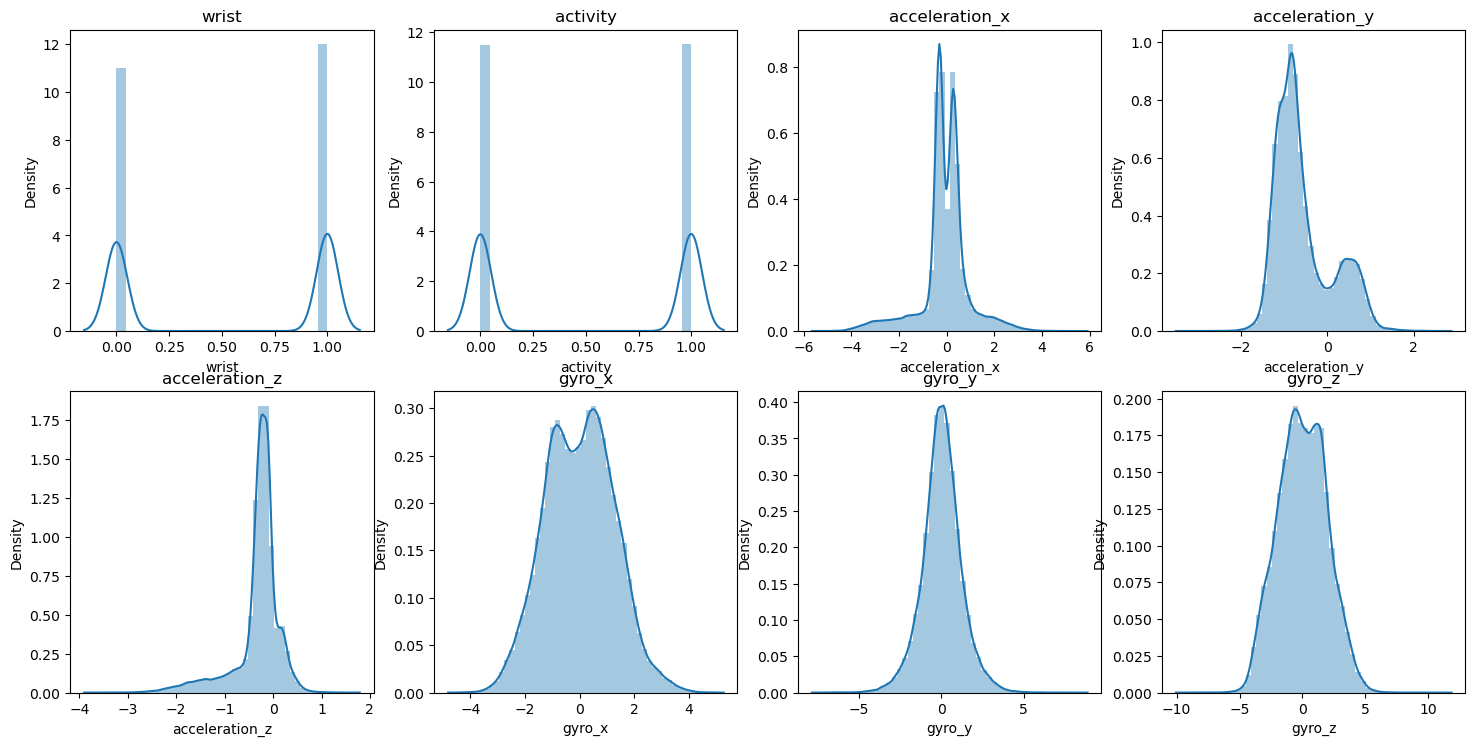

In [16]:
plt.figure(figsize=(18,18))
i=1
for x in data.columns:
    plt.subplot(4,4,i)
    sns.distplot(data[x])
    plt.title(x)
    i+=1

## Analysis of Outliers

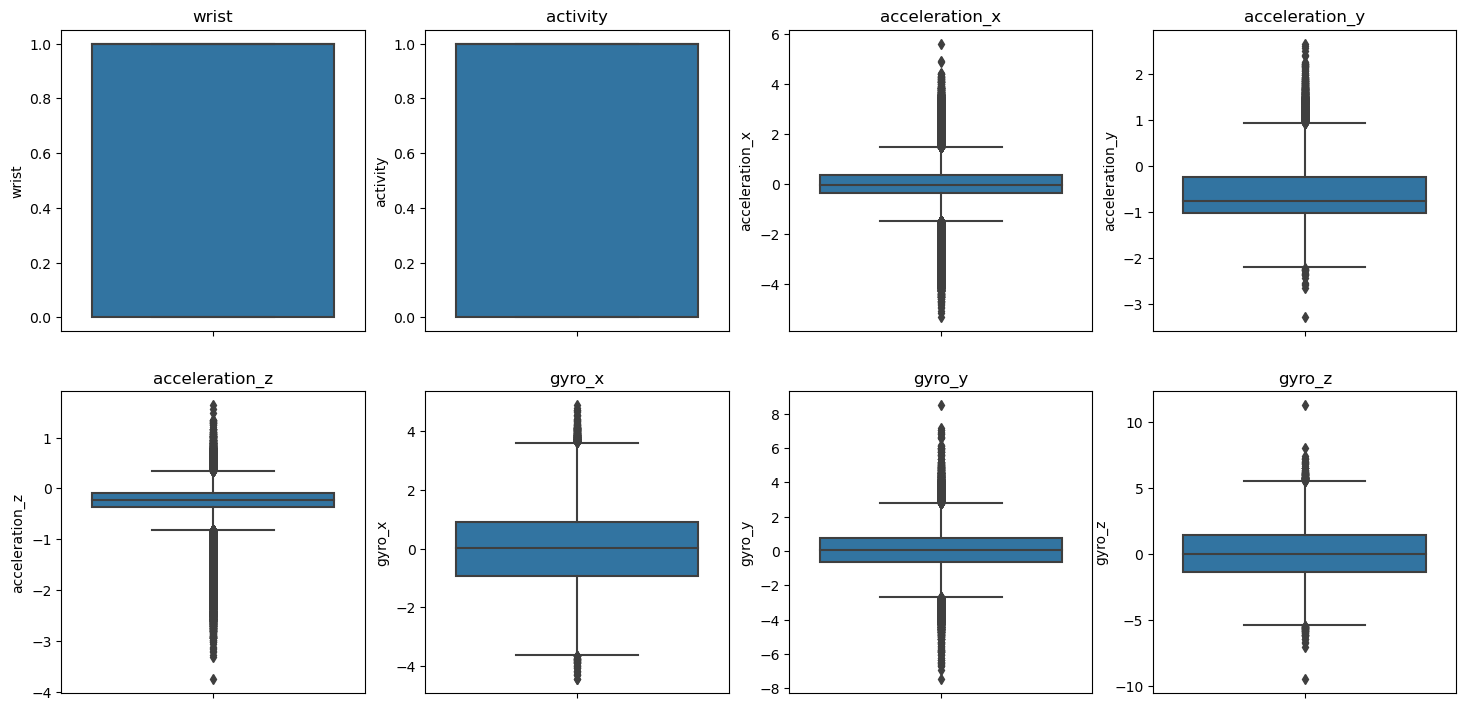

In [17]:
plt.figure(figsize=(18,18))
i=1
for x in data.columns:
    plt.subplot(4,4,i)
    sns.boxplot(y=data[x])
    plt.title(x)
    i+=1

## Classifying activities into walk and run:

In [18]:
print('Data contains ' + str(pd.value_counts(data['activity'].values)[0]) +
      ' "walk" data samples as well as ' + str(pd.value_counts(data['activity'].values)[1]) + 
      ' "run" data samples')

Data contains 44223 "walk" data samples as well as 44365 "run" data samples


# Classifying wrist into left and right:
0: "left"
1: "right"

In [19]:
print('The data contains ' + str(pd.value_counts(data['wrist'].values)[0]) + 
      ' data samples collected on the left wrist as well as ' + str(pd.value_counts(data['wrist'].values)[1]) + 
      ' data samples collected on the right wrist')

The data contains 42330 data samples collected on the left wrist as well as 46258 data samples collected on the right wrist


In [20]:
df=data.copy ()

In [21]:
Features = ['acceleration_x', 'acceleration_y', 'acceleration_z', 'gyro_x', 'gyro_y', 'gyro_z']

# populate dataframe with 'left' wrist only
df_left_wrist_data = pd.DataFrame()
df_left_wrist_data = df[df.wrist == 0]

# populate dataframe with 'right' wrist only
df_right_wrist_data = pd.DataFrame()
df_right_wrist_data = df[df.wrist == 1]

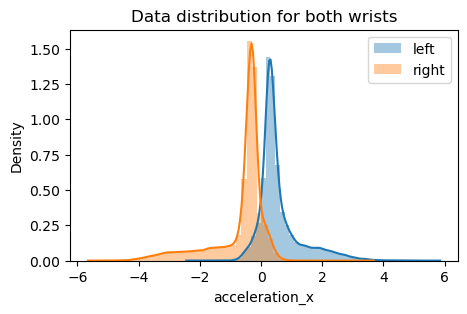

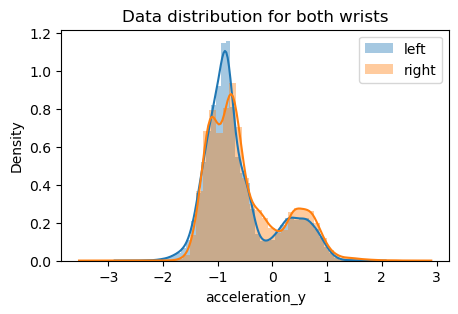

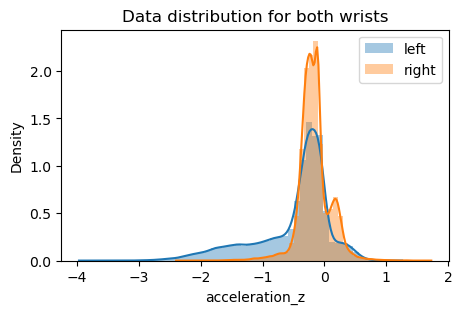

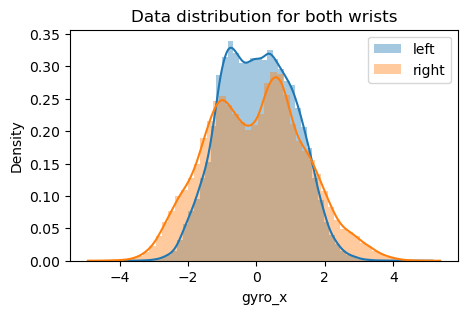

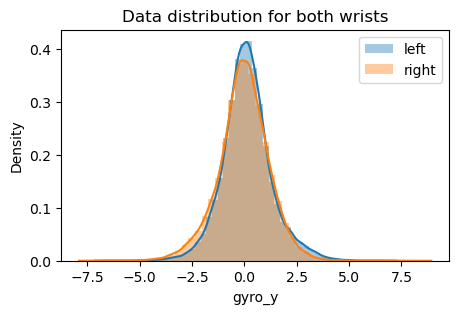

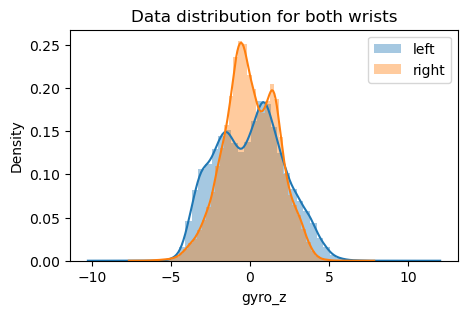

In [31]:
for c in Features:
    plt.figure(figsize=(5,3))
    plt.title("Data distribution for both wrists")
    sns.distplot(df_left_wrist_data[c], label='left')
    sns.distplot(df_right_wrist_data[c], label='right')
    plt.legend()
    plt.show()

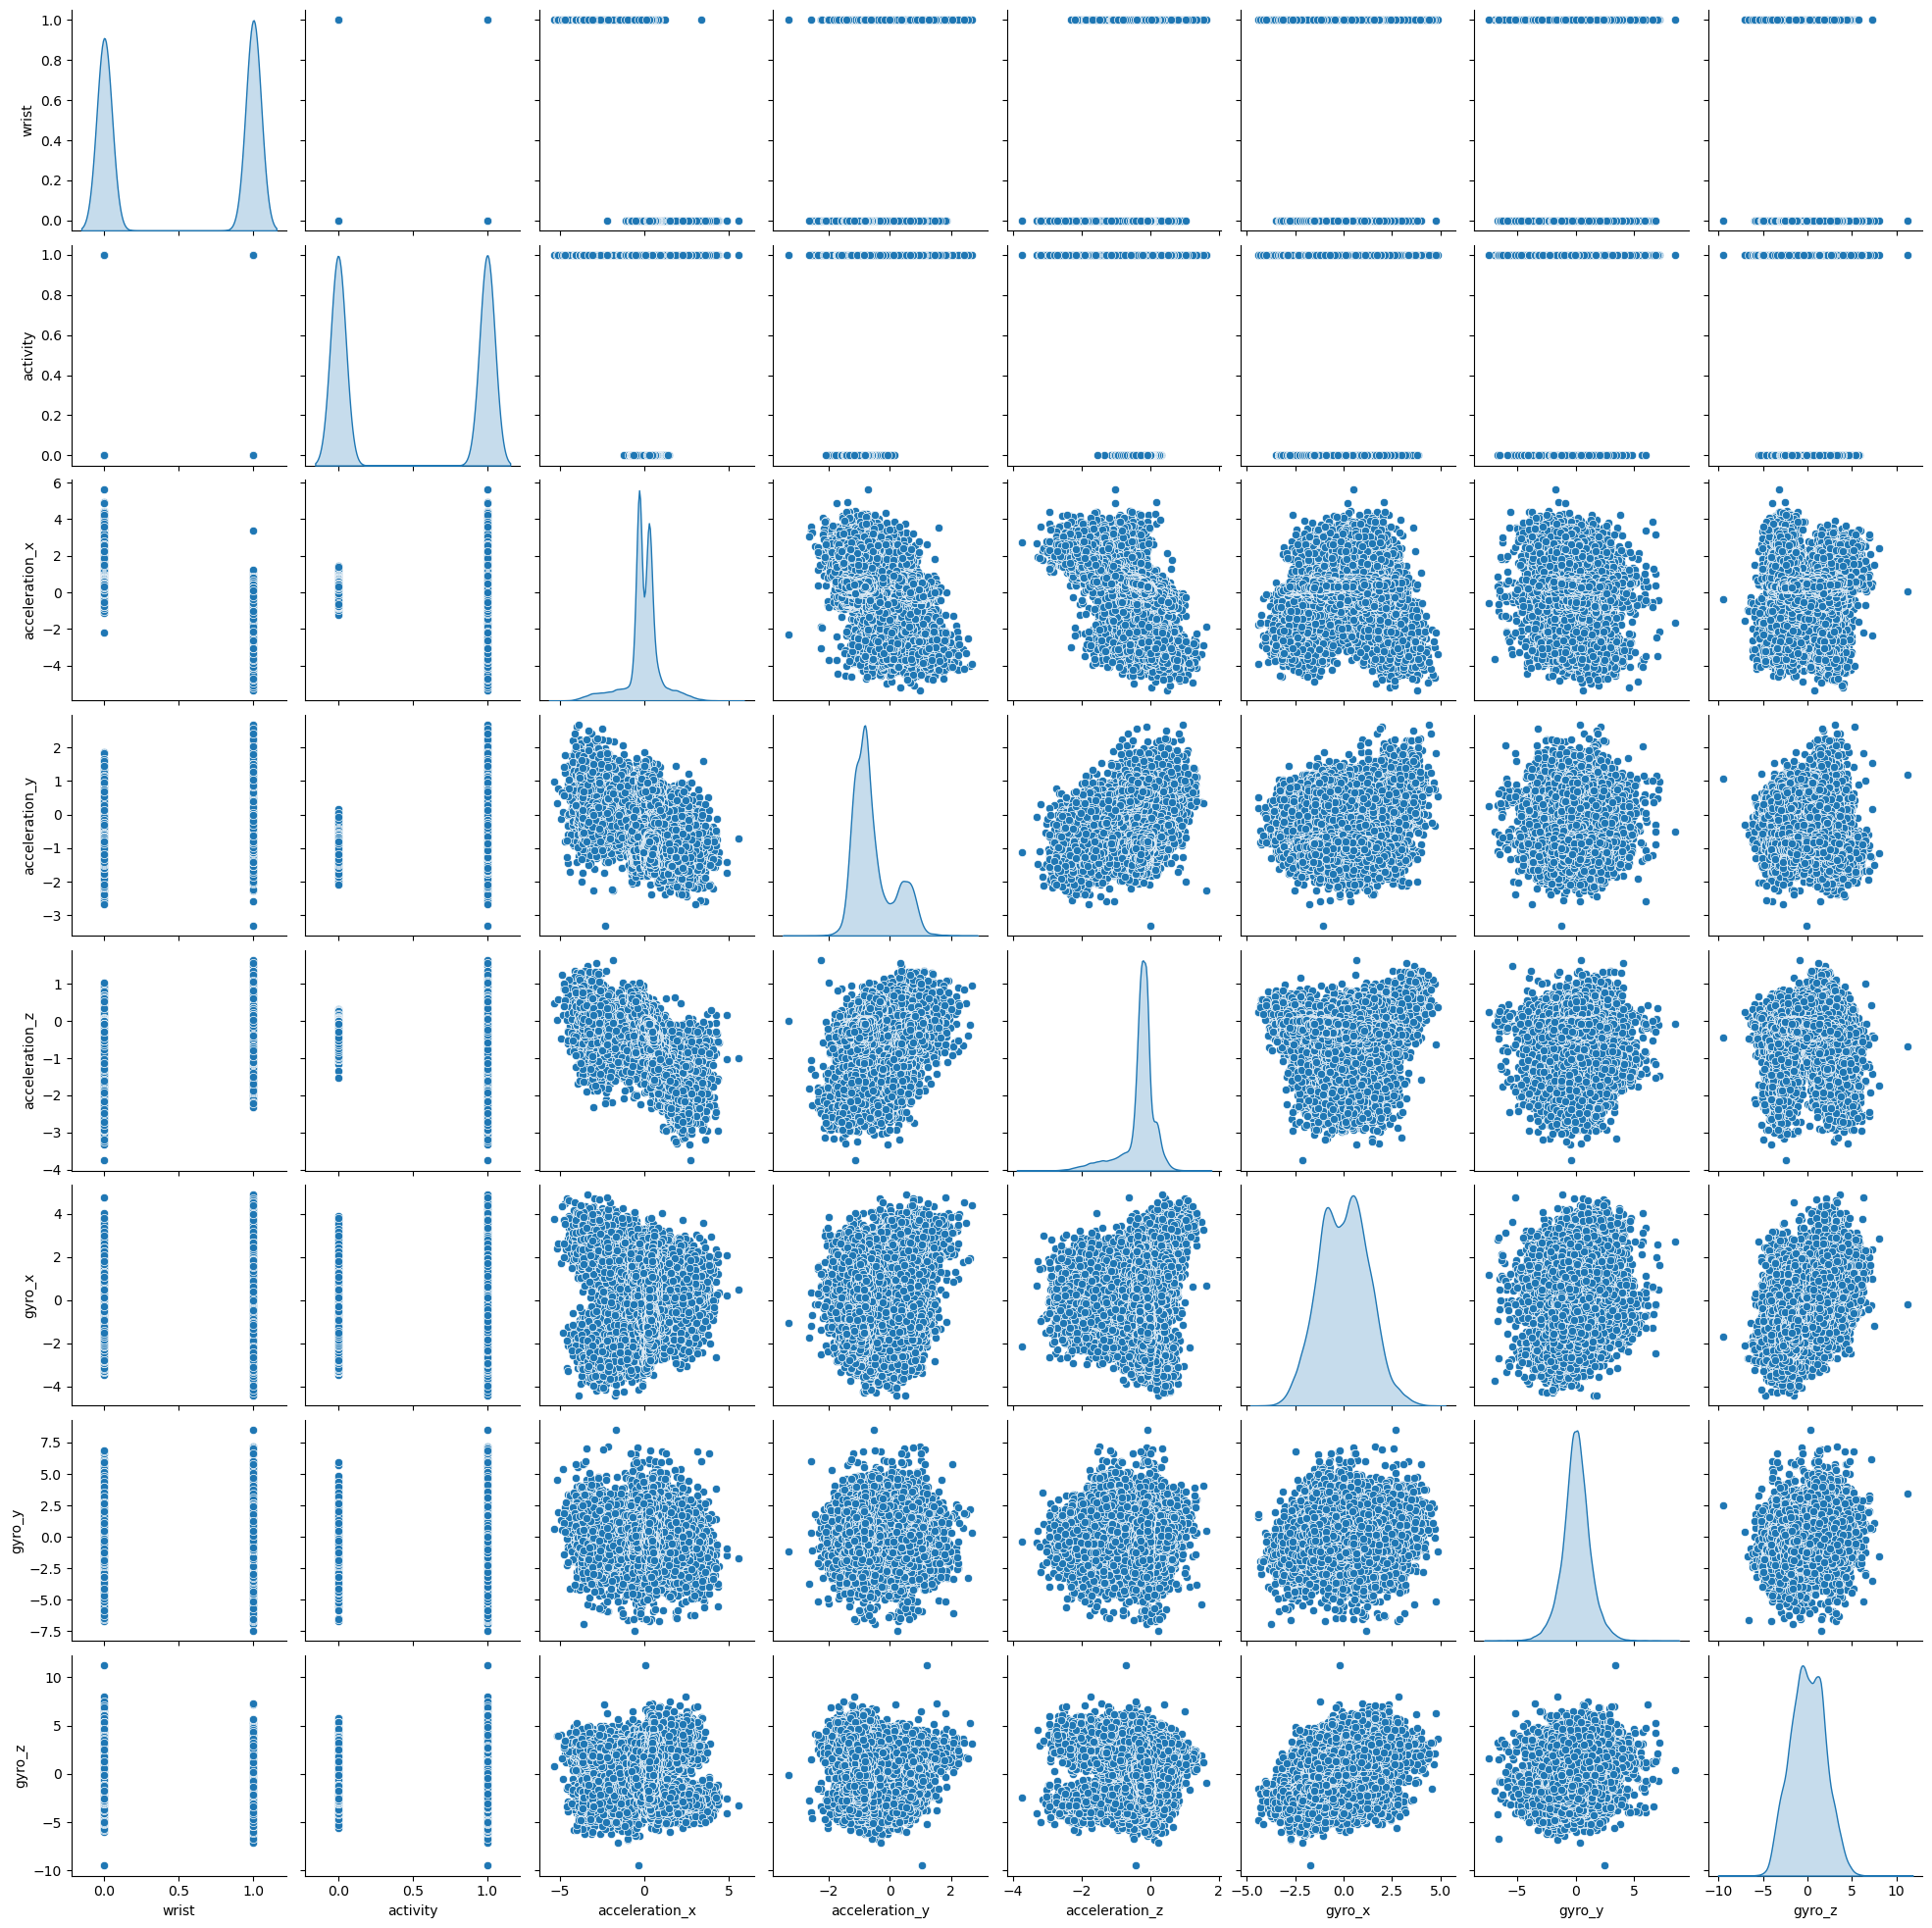

In [120]:
sns.pairplot(data, diag_kind='kde')

## Feature Selection

In [16]:
data.corr()

,wrist,activity,acceleration_x,acceleration_y,acceleration_z,gyro_x,gyro_y,gyro_z
wrist,1.000000,-0.113404,-0.609579,0.087091,0.323680,-0.022092,-0.068403,0.008796
activity,-0.113404,1.000000,-0.017747,0.639520,-0.192435,0.040856,0.012055,-0.008106
acceleration_x,-0.609579,-0.017747,1.000000,-0.265169,-0.552374,-0.021705,-0.004091,-0.060849
acceleration_y,0.087091,0.639520,-0.265169,1.000000,0.106220,0.010549,0.072170,-0.022994
acceleration_z,0.323680,-0.192435,-0.552374,0.106220,1.000000,0.035296,-0.021004,0.049621
gyro_x,-0.022092,0.040856,-0.021705,0.010549,0.035296,1.000000,0.094011,0.317769
gyro_y,-0.068403,0.012055,-0.004091,0.072170,-0.021004,0.094011,1.000000,0.287244
gyro_z,0.008796,-0.008106,-0.060849,-0.022994,0.049621,0.317769,0.287244,1.000000


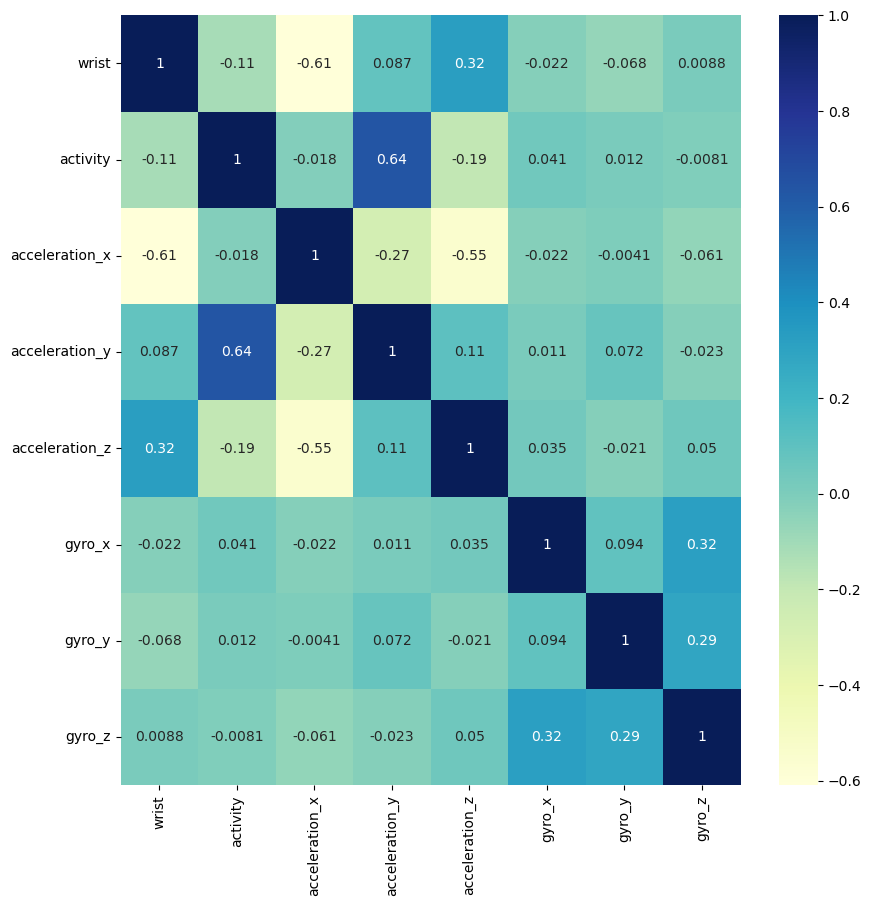

In [27]:
plt.figure(figsize=(10,10))
sns.heatmap(data.corr(), cmap='YlGnBu',annot=True)
plt.show()

## Model Creation

In [122]:
data.head(10)

,wrist,activity,acceleration_x,acceleration_y,acceleration_z,gyro_x,gyro_y,gyro_z
0,0,0,0.2650,-0.7814,-0.0076,-0.0590,0.0325,-2.9296
1,0,0,0.6722,-1.1233,-0.2344,-0.1757,0.0208,0.1269
2,0,0,0.4399,-1.4817,0.0722,-0.9105,0.1063,-2.4367
3,0,0,0.3031,-0.8125,0.0888,0.1199,-0.4099,-2.9336
4,0,0,0.4814,-0.9312,0.0359,0.0527,0.4379,2.4922
5,0,0,0.4044,-0.8056,-0.0956,0.6925,-0.2179,2.5750
6,0,0,0.6320,-1.1290,-0.2982,0.0548,-0.1896,0.4473
7,0,0,0.6670,-1.3503,-0.0880,-0.8094,-0.7938,-1.4348
8,0,0,0.2704,-0.8633,0.1293,-0.4173,-0.1904,-2.6759
9,0,0,0.4690,-1.0740,0.0219,0.0388,1.1491,1.6982


In [24]:
x=data.drop(['wrist','activity'], axis=1)
Y=data[['activity']]

## Scaling the Data

In [25]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x_scaled = sc.fit_transform(x)
x_scaled

array([[ 0.33668266, -0.33231618,  0.6293112 , -0.05039065, -0.00392358,
        -1.5419494 ],
       [ 0.74013342, -0.85156246,  0.16342314, -0.14349622, -0.013684  ,
         0.05462392],
       [ 0.50997229, -1.39586742,  0.79323478, -0.72973418,  0.05764218,
        -1.28448139],
       ...,
       [ 0.52859919, -0.93463579,  0.06420624, -1.16015794, -0.26395131,
        -0.67066385],
       [ 0.3307379 , -0.44895295,  0.4890107 , -1.21321296,  0.34937044,
        -0.93910129],
       [ 0.3852315 , -0.36177911,  0.45778716,  0.09106279,  0.87409756,
         0.65768097]])

## Train-Test Split

In [26]:
from sklearn.model_selection import train_test_split

In [27]:
X_train, X_test, Y_train, Y_test = train_test_split(x_scaled, Y, test_size=0.25, random_state=10) 
X_train.shape, X_test.shape,Y_train.shape, Y_test.shape

((66441, 6), (22147, 6), (66441, 1), (22147, 1))

## Logistic Regression Model 

In [28]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
lr.fit(X_train,Y_train)
Y_pred = lr.predict(X_test)

In [29]:
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix
print(confusion_matrix(Y_test,Y_pred))
print(classification_report(Y_test,Y_pred))
lr_ac = accuracy_score(Y_test,Y_pred)
print(lr_ac)

[[9966 1074]
 [2151 8956]]
              precision    recall  f1-score   support

           0       0.82      0.90      0.86     11040
           1       0.89      0.81      0.85     11107

    accuracy                           0.85     22147
   macro avg       0.86      0.85      0.85     22147
weighted avg       0.86      0.85      0.85     22147

0.854382083352147


[[9965 1075]
 [2151 8956]]


<Axes: >

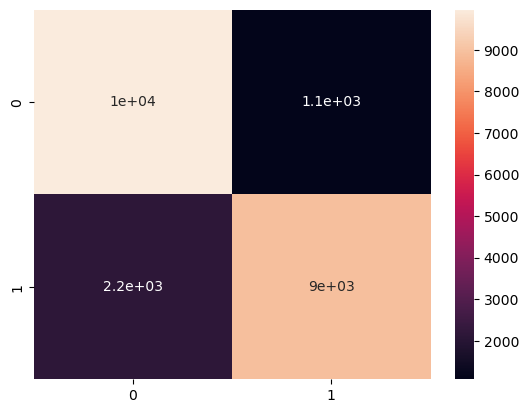

In [51]:
from sklearn.metrics import confusion_matrix
print(confusion_matrix(Y_test,Y_pred))
#print(classification_report(y_test,pred_lr))

cm = confusion_matrix(Y_test, Y_pred)

sns.heatmap(cm, annot=True)

## KNN
KNN works by finding the distances between a query and all the examples in the data, selecting the specified number examples (K) closest to the query, then votes for the most frequent label (in the case of classification) or averages the labels (in the case of regression).

The k-nearest neighbors (KNN) algorithm is a simple, supervised machine learning algorithm that can be used to solve both classification and regression problems. It’s easy to implement and understand, but has a major drawback of becoming significantly slows as the size of that data in use grows.

In [53]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()

# fit the model
knn.fit(X_train, Y_train)

# predict the response
pred_knn = knn.predict(X_test)

# accuracy score
knn_acc = accuracy_score(Y_test, pred_knn)
print ("Accuracy for KNN: {}".format(knn_acc))

Accuracy for KNN: 0.9897954576240574


## Decision Tree

In [64]:
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier(splitter='best',criterion='entropy',min_samples_split=3,min_samples_leaf=3)
dt.fit(X_train,Y_train)
Y_pred_dt = dt.predict(X_test)

In [69]:
print(confusion_matrix(Y_test,Y_pred_dt))
print(classification_report(Y_test,Y_pred_dt))
dt_ac = accuracy_score(Y_test,Y_pred_dt)
print(dt_ac)

[[10882   158]
 [  183 10924]]
              precision    recall  f1-score   support

           0       0.98      0.99      0.98     11040
           1       0.99      0.98      0.98     11107

    accuracy                           0.98     22147
   macro avg       0.98      0.98      0.98     22147
weighted avg       0.98      0.98      0.98     22147

0.9846028807513433


## SVM 

 The objective of the support vector machine algorithm is to find a hyperplane in an N-dimensional space(N — the number of features) that distinctly classifies the data points

To separate the two classes of data points, there are many possible hyperplanes that could be chosen. Our objective is to find a plane that has the maximum margin, i.e the maximum distance between data points of both classes. Maximizing the margin distance provides some reinforcement so that future data points can be classified with more confidence.

Hyperplanes are decision boundaries that help classify the data points. Data points falling on either side of the hyperplane can be attributed to different classes. Also, the dimension of the hyperplane depends upon the number of features. If the number of input features is 2, then the hyperplane is just a line. If the number of input features is 3, then the hyperplane becomes a two-dimensional plane. It becomes difficult to imagine when the number of features exceeds 3.

In the SVM algorithm, we are looking to maximize the margin between the data points and the hyperplane. The loss function that helps maximize the margin is hinge loss.

In [59]:
from sklearn.svm import SVC
#instantiate the estimator
svm = SVC()

# fit the model
svm.fit(X_train, Y_train)

# predict the response
pred_svm = svm.predict(X_test)

# accuracy score
svm_acc = accuracy_score(Y_test, pred_svm)
print ("Accuracy for SVM: {}".format(svm_acc))

Accuracy for SVM: 0.988802095091886


## XGradientBoosting

In [71]:
pip install xgboost

Note: you may need to restart the kernel to use updated packages.


In [73]:
from xgboost import XGBClassifier
#from xgboost import XGBClassifier
#from xgboost.xgbclassifier import XGBClassifier
xgb = XGBClassifier(random_state=42,verbosity=0,silent=0)
xgb.fit(X_train,Y_train)
Y_pred_xgb = xgb.predict(X_test)

In [76]:
print(confusion_matrix(Y_test,Y_pred_xgb))
print(classification_report(Y_test,Y_pred_xgb))
xgb_ac = accuracy_score(Y_test,Y_pred_xgb)
print(xgb_ac)

[[10946    94]
 [  102 11005]]
              precision    recall  f1-score   support

           0       0.99      0.99      0.99     11040
           1       0.99      0.99      0.99     11107

    accuracy                           0.99     22147
   macro avg       0.99      0.99      0.99     22147
weighted avg       0.99      0.99      0.99     22147

0.9911500428952003


## Naive Bayes

Naive Bayes is the most straightforward and fast classification algorithm, which is suitable for a large chunk of data. Naive Bayes classifier is successfully used in various applications such as spam filtering, text classification, sentiment analysis, and recommender systems. It uses Bayes theorem of probability for prediction of unknown class.

Naive Bayes classifier assumes that the effect of a particular feature in a class is independent of other features. For example, a loan applicant is desirable or not depending on his/her income, previous loan and transaction history, age, and location. Even if these features are interdependent, these features are still considered independently.

Naive comes from the fact that the classifier will go ahead and assume / accept the fact that some features are actually dependent on others, but even with this interdependence, there are still good, fast reliable results with large data sets.

In [77]:
from sklearn.naive_bayes import GaussianNB
# instantiate the estimator
nb = GaussianNB()

# fit the model
nb.fit(X_train, Y_train)

# predict the response
pred_nb = nb.predict(X_test)

# accuracy score
nb_acc = accuracy_score(Y_test, pred_nb)
print ("Accuracy for Gaussian Naive Bayes: {}".format(nb_acc))

Accuracy for Gaussian Naive Bayes: 0.958685149230144


## Model Performances

In [83]:
Accuracy_Score_1 = pd.DataFrame([lr_ac,knn_acc,dt_ac,svm_acc,xgb_ac , nb_acc],
             index=['Logistic Regression','KNN','Decission Tree','Random Forest','XGradient Boosting' , 'Naive Bayes'],columns=['Accuracy'])

In [80]:
Accuracy_Score_1

,Accuracy
Logistic Regression,0.854337
KNN,0.989795
Decission Tree,0.984603
Random Forest,0.988802
XGradient Boosting,0.991150
Naive Bayes,0.958685


In [85]:
Accuracy_Score = [lr_ac,knn_acc,dt_ac,svm_acc,xgb_ac , nb_acc]
Models = ['Logistic Regression','KNN','Decission Tree','Random Forest','XGradient Boosting' , 'Naive Bayes']

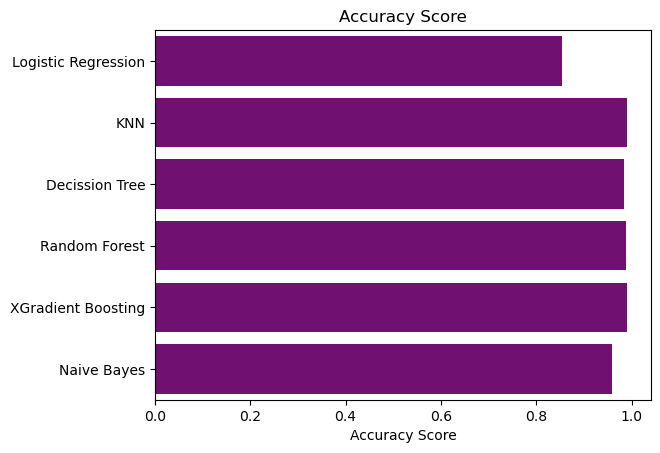

In [98]:
sns.barplot(x=Accuracy_Score, y=Models, color="purple")
plt.xlabel('Accuracy Score')
plt.title('Accuracy Score')
plt.show()

## Creating Pickle File 

In [18]:
import pickle

In [30]:
with open('data.pkl', 'wb') as file:
    pickle.dump(lr_ac, file)

In [31]:
with open('data.pkl', 'rb') as f:
    pred=pickle.load(f)

## OUTCOME
As we can clearly see, the data provided and the  ML Algorithm we used suggest that the Random Forest or 
XGradient Boosting model is suitable for prediction in this Project.